# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# 2 Import data

In [2]:
# Defining path
path=r'C:\Users\ponni\Achievement 4'

In [3]:
# Import merged data
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_5.pkl'))

In [7]:
# creating normal purchase customers
df_merged.loc[df_merged['max_order']>=5,'activity']='normal'

In [8]:
df_merged2=df_merged[df_merged['activity']=='normal']

In [9]:
df_merged2.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income($),regions,activity
0,65,1,1,2,8,999.0,-60,Soda,7,9.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
1,75,1,2,3,7,15.0,-60,Soda,7,9.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
2,-109,1,3,3,12,21.0,-60,Soda,7,9.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
3,-112,1,4,4,7,29.0,-60,Soda,7,9.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
4,-82,1,5,4,15,28.0,-60,Soda,7,9.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal


In [21]:
# Q5) Creating pet owners
# Department numbers 8 is pet related items
df_merged2.loc[(df_merged2['department_id']==8), 'pet owners']= 'having pets'

In [22]:
df_merged2.loc[(df_merged2['department_id']!=8), 'pet owners']= 'no pets'

In [23]:
df_merged2['pet owners'].value_counts()

no pets        30871504
having pets       93060
Name: pet owners, dtype: int64

In [41]:
# Creating age categories
df_merged2.loc[(df_merged2['age']>=17)&(df_merged2['age']<=30),'age_category']='young adults'
df_merged2.loc[(df_merged2['age']>=31)&(df_merged2['age']<=45),'age_category']='middle aged adults'
df_merged2.loc[df_merged2['age']>46,'age_category']='old adults'

In [42]:
df_merged2['age_category'].value_counts()

old adults            17397507
middle aged adults     7262817
young adults           6304240
Name: age_category, dtype: int64

In [46]:
# Q7) Aggregating
# a) age category expenditures
df_merged2.groupby('age_category').agg({'prices':['mean', 'min','max']})

prices           
                        mean  min   max
age_category                           
middle aged adults  7.792969  1.0  25.0
old adults          7.792969  1.0  25.0
young adults        7.781250  1.0  25.0

In [48]:
# a) age category usage frequency
df_merged2.groupby('age_category').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order            
                                     mean  min    max
age_category                                         
middle aged adults               63.50000  0.0  999.0
old adults                       63.93750  0.0  999.0
young adults                     63.90625  0.0  999.0

In [47]:
# b) pet owners expenditures
df_merged2.groupby('pet owners').agg({'prices':['mean', 'min','max']})

prices           
                 mean  min   max
pet owners                      
having pets  7.886719  1.0  15.0
no pets      7.789062  1.0  25.0

In [49]:
# b) pet owners usage frequency
df_merged2.groupby('pet owners').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order            
                              mean  min    max
pet owners                                    
having pets                67.3750  0.0  999.0
no pets                    63.8125  0.0  999.0

# Visualisations

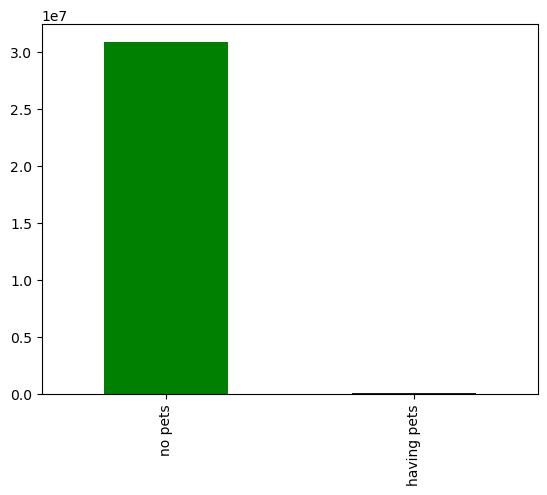

In [57]:
# Bar graph for pet owners
pets_barchart=df_merged2['pet owners'].value_counts().plot.bar(color=['green','blue'])

#### The purchase of pet related items are very less. It should be investigated further. It maybe because the products available are less or the brands of the pet foods or collection of pet things. Increase in pet related items can be considered.

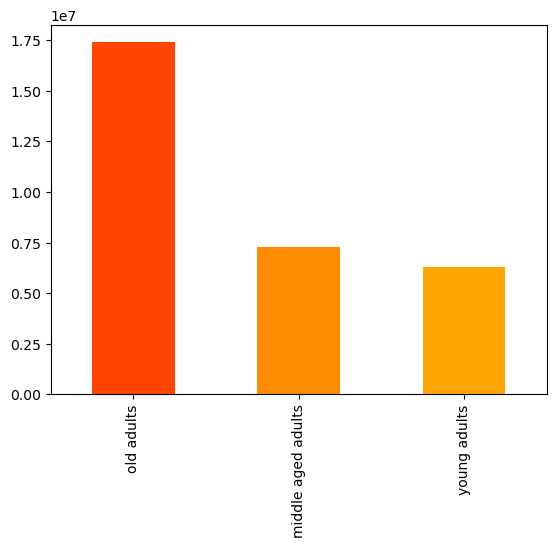

In [60]:
# Bar graph for age category
age_cat_bar=df_merged2['age_category'].value_counts().plot.bar(color=['orangered','darkorange','orange'])

#### Most of the instacart orders are from old adults (age > 46) category. 

#### a) Family status

In [62]:
# To create a family status flag to find parents of young children, parents of older children, and people with no children
# Department id # 18 is designated 'babies' and will be used here to identify families with young children
df_merged2.loc[(df_merged2['department_id']==18)&(df_merged2['no_of_dependants']>0),'family_status']='family with young children'

C:\Users\ponni\AppData\Local\Temp\ipykernel_13808\1089156280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged2.loc[(df_merged2['department_id']==18)&(df_merged2['no_of_dependants']>0),'family_status']='family with young children'


In [63]:
df_merged2.loc[(df_merged2['department_id']!=18)&(df_merged2['no_of_dependants']>0),'family_status']='family with older children'

In [65]:
df_merged2.loc[df_merged2['no_of_dependants']==0,'family_status']='no children' 

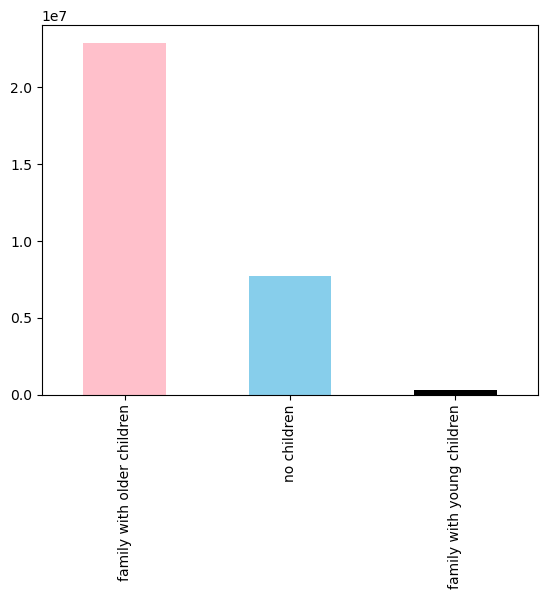

In [68]:
# Bar graph for family status
baby=familystatus_bar=df_merged2['family_status'].value_counts().plot.bar(color=['pink','skyblue','black'])

#### From this graph it is visible that most of the orders from family with older children

In [69]:
# exporting the bar charts
baby.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'family_status.png'))

In [70]:
age_cat_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_category.png'))

In [71]:
pets_barchart.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pet owners.png'))

In [72]:
# Q8)
#crosstabulating family status by region
crosstab_fam_status=pd.crosstab(df_merged2['regions'],df_merged2['family_status'],dropna=False)

In [73]:
crosstab_fam_status

family_status,family with older children,family with young children,no children
regions,,,
Midwest,5367664,71033,1822816
Northeast,4055516,54687,1354482
South,7624975,104231,2581933
West,5869664,77113,1980450


In [74]:
# To crosstabulate pet owners by region
crosstab_petowners=pd.crosstab(df_merged2['regions'],df_merged2['pet owners'],dropna=False)

In [75]:
crosstab_petowners

pet owners,having pets,no pets
regions,,
Midwest,21358,7240155
Northeast,17734,5446951
South,29909,10281230
West,24059,7903168


In [76]:
# To crosstabulate age category by region
crosstab_agecategory=pd.crosstab(df_merged2['regions'],df_merged2['age_category'],dropna=False)

In [77]:
crosstab_agecategory

age_category,middle aged adults,old adults,young adults
regions,,,
Midwest,1723183,4077283,1461047
Northeast,1261452,3091757,1111476
South,2449358,5734879,2126902
West,1828824,4493588,1604815


# Exporting data

In [78]:
# Exporting the df_merged dataset
df_merged2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_finaldataset.pkl'))